# Load Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the Data

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2024-03-15 12:07:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip’

bank-additional.zip     [  <=>               ] 434.15K  1.85MB/s    in 0.2s    

2024-03-15 12:08:00 (1.85 MB/s) - ‘bank-additional.zip’ saved [444572]



In [5]:
!unzip /content/bank-additional.zip

Archive:  /content/bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [45]:
df = pd.read_csv("/content/bank-additional/bank-additional-full.csv", sep=';')
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Cleaning


## Handling missing values
We can check for null values using .isnull(), we will treat the unknown values as different catergorical value as descriped in bank-additional-names.txt

In [46]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Removing duplicates
We can use .drop_duplicates()

In [47]:
print(f"df duplicates before drop: {df.duplicated().sum()}")
print(f"droping duplicates")
df = df.drop_duplicates()
print(f"df duplicates after drop: {df.duplicated().sum()}")

df duplicates before drop: 12
droping duplicates
df duplicates after drop: 0


## Quick View for the the data
We can use .describe() and .info()

In [48]:
df.describe(),df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

(               age      duration      campaign         pdays      previous  \
 count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
 mean      40.02380    258.315815      2.567879    962.464810      0.173013   
 std       10.42068    259.305321      2.770318    186.937102      0.494964   
 min       17.00000      0.000000      1.000000      0.000000      0.000000   
 25%       32.00000    102.000000      1.000000    999.000000      0.000000   
 50%       38.00000    180.000000      2.000000    999.000000      0.000000   
 75%       47.00000    319.000000      3.000000    999.000000      0.000000   
 max       98.00000   4918.000000     56.000000    999.000000      7.000000   
 
        emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
 count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
 mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
 std        1.570883        0.578839     

## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

In [49]:
print(df["job"].unique())
print(df["marital"].unique())
print(df["education"].unique())
print(df["default"].unique())
print(df["housing"].unique())
print(df["contact"].unique())
print(df["month"].unique())
print(df["day_of_week"].unique())
print(df["poutcome"].unique())
print(df["y"].unique())
# no ambigious age
print(df.loc[df['age'] <= 0, "age"].sum())
# no ambigious duration
print(df.loc[df['duration'] < 0, "duration"].sum())
# no ambigious campaign
print(df.loc[df['campaign'] < 0, "campaign"].sum())
# no ambigious pdays
print(df.loc[df['pdays'] < 0, "pdays"].sum())
# no ambigious previous
print(df.loc[df['previous'] < 0, "previous"].sum())


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']
0
0
0
0
0


## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

#box plots and histograms for numerical data

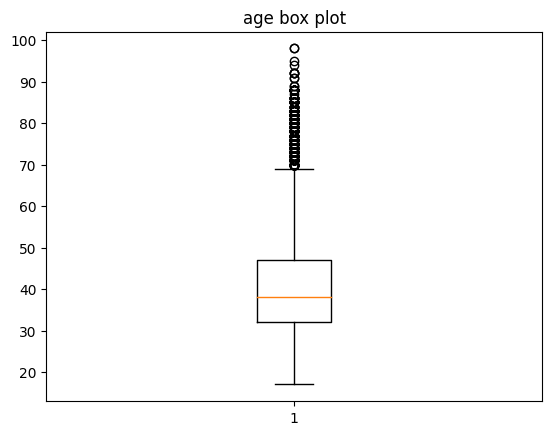

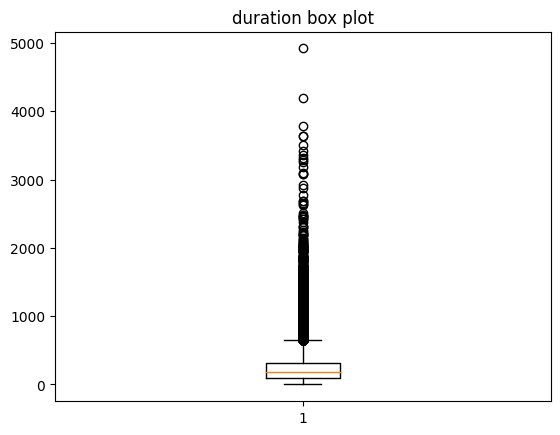

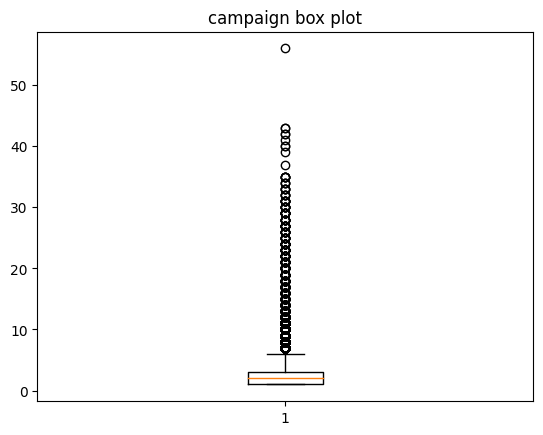

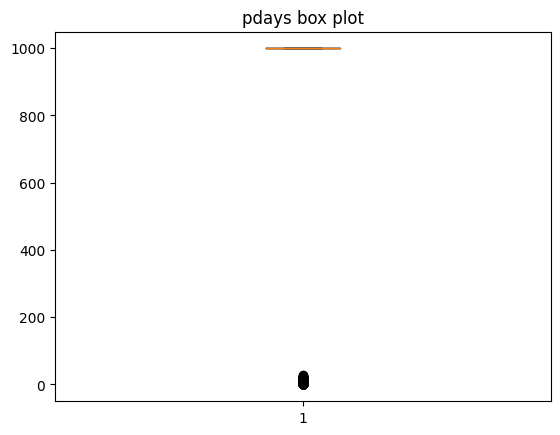

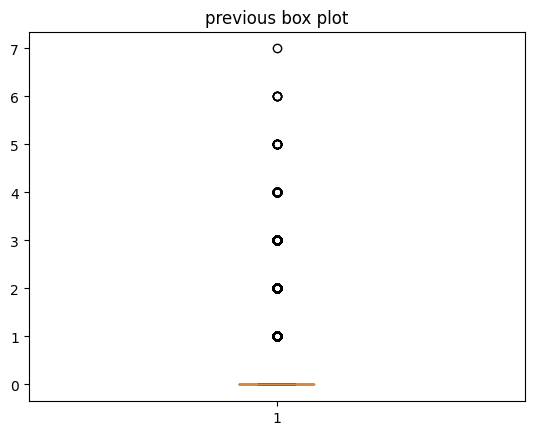

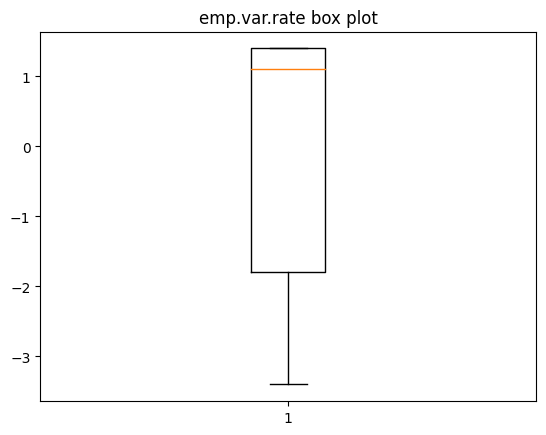

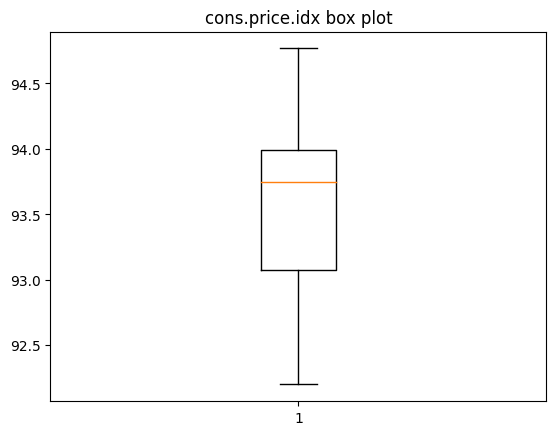

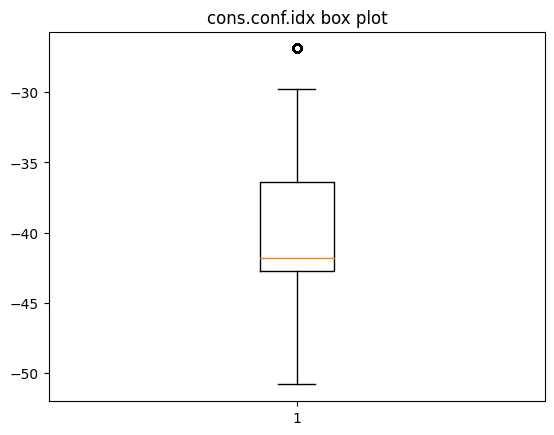

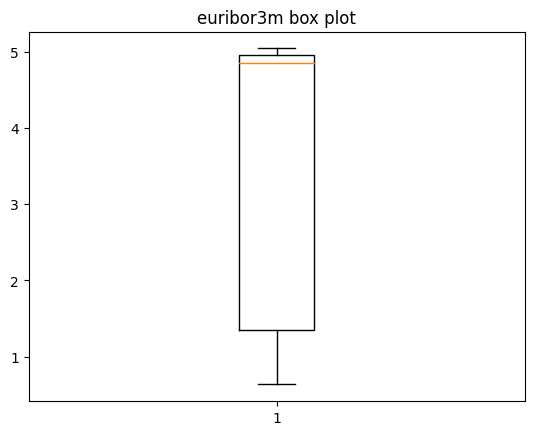

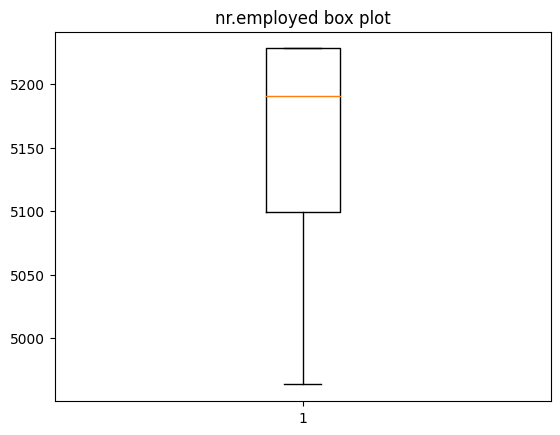

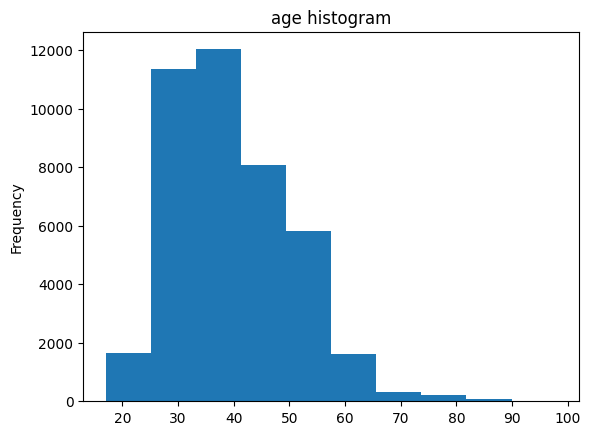

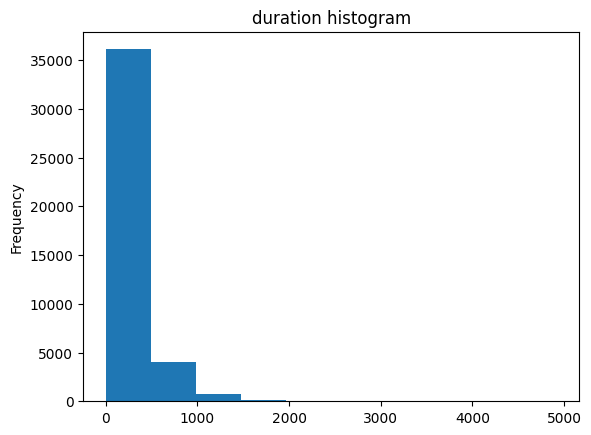

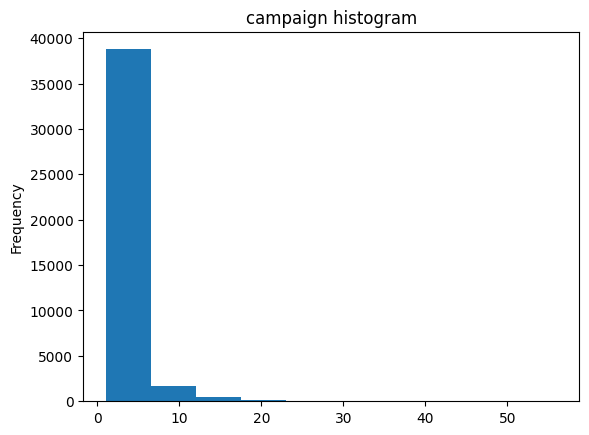

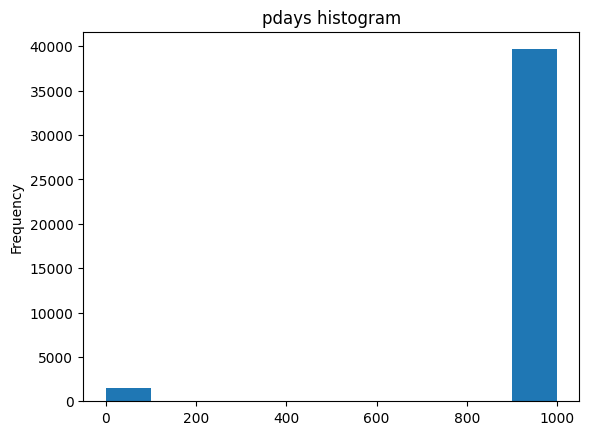

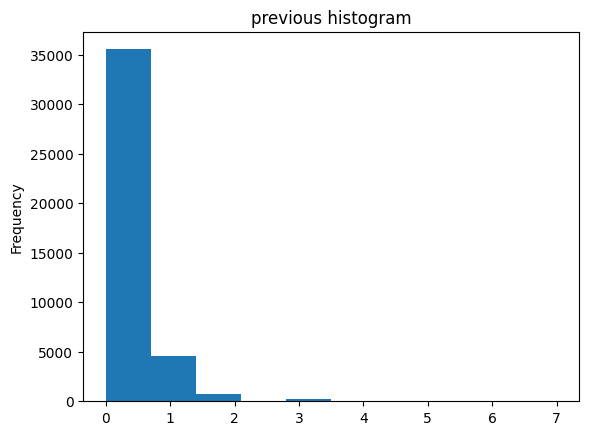

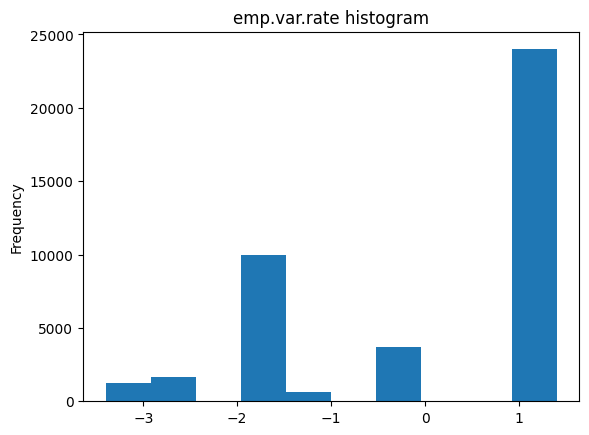

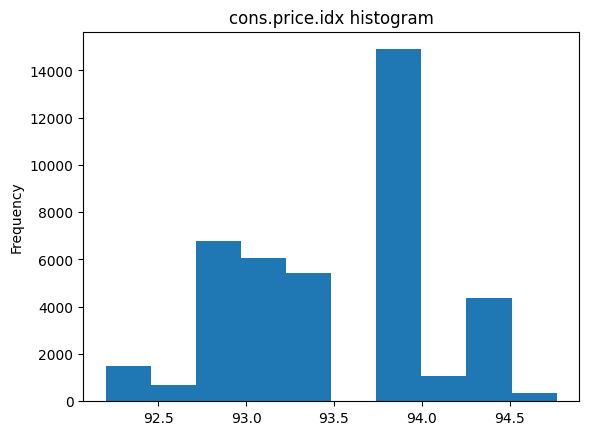

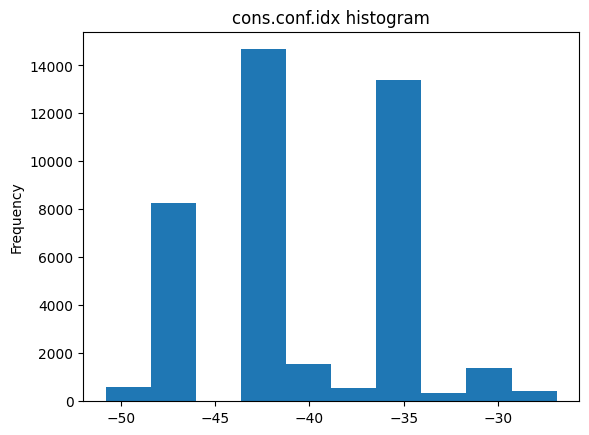

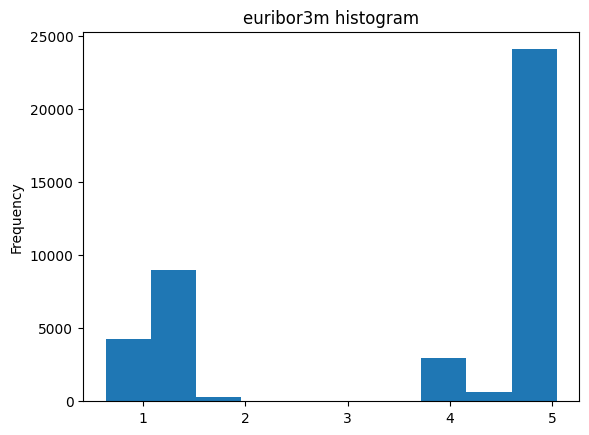

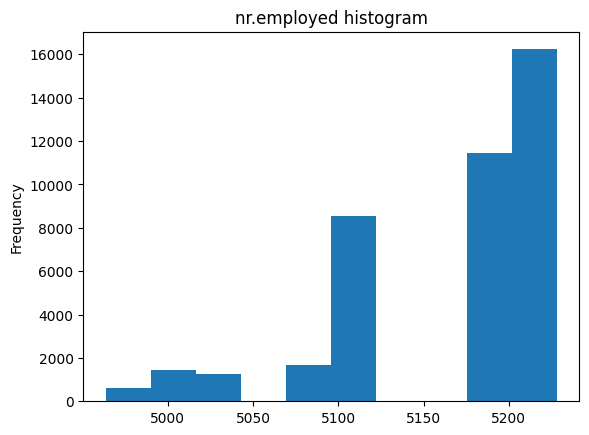

In [50]:
columns = df.select_dtypes(exclude="object").columns

for column in columns:
  plt.boxplot(df[column])
  plt.title(f'{column} box plot')
  plt.show()


for column in columns:
  df[column].plot.hist()
  plt.title(f"{column} histogram")
  plt.show()

#z-score for numeric data

In [51]:
from scipy.stats import zscore

# Select numerical columns only
numerical_cols = df.select_dtypes(include='number').columns

# Calculate z-scores for numerical columns
z_score_df = df[numerical_cols].apply(zscore)

print("Z-Scores:")
z_score_df

Z-Scores:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533143,0.010352,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
1,1.629107,-0.421577,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
2,-0.290177,-0.124626,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
3,-0.002284,-0.413864,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
4,1.533143,0.187751,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
...,...,...,...,...,...,...,...,...,...,...
41183,3.164534,0.291876,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41184,0.573501,0.480845,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41185,1.533143,-0.267317,-0.204990,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689
41186,0.381573,0.708379,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689


## Scatter plots to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


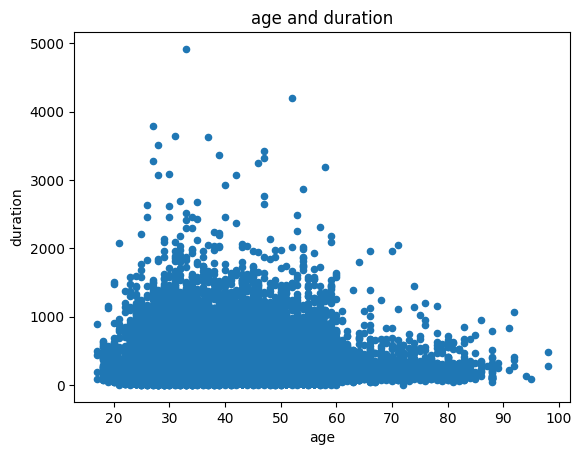

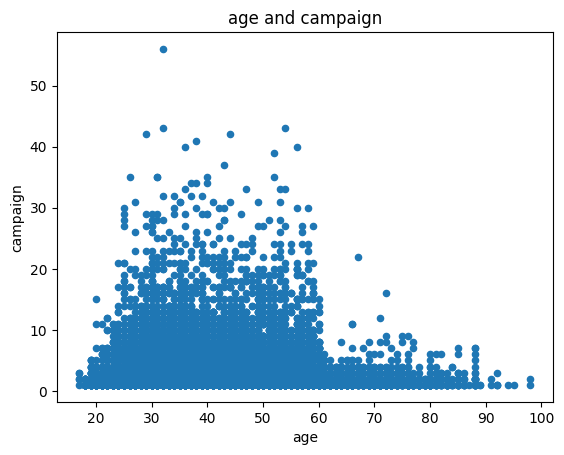

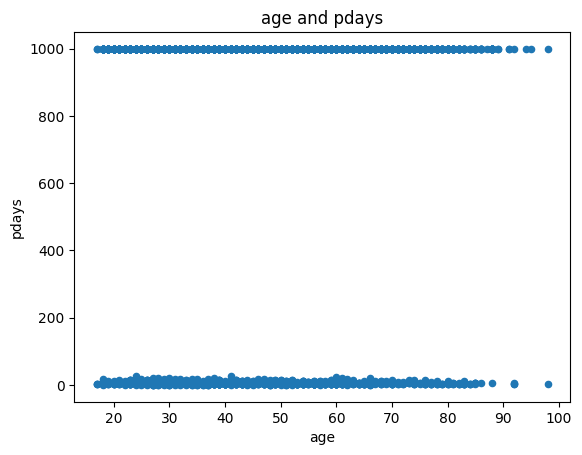

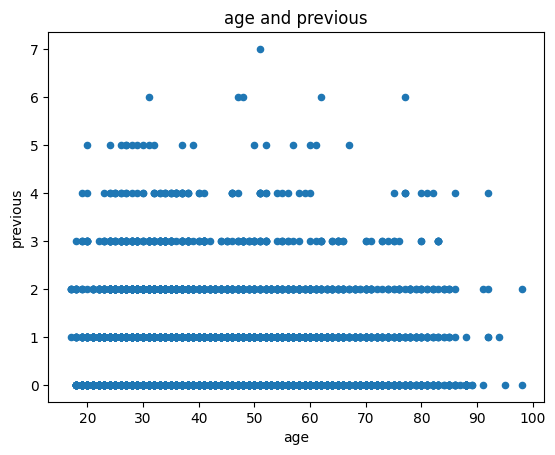

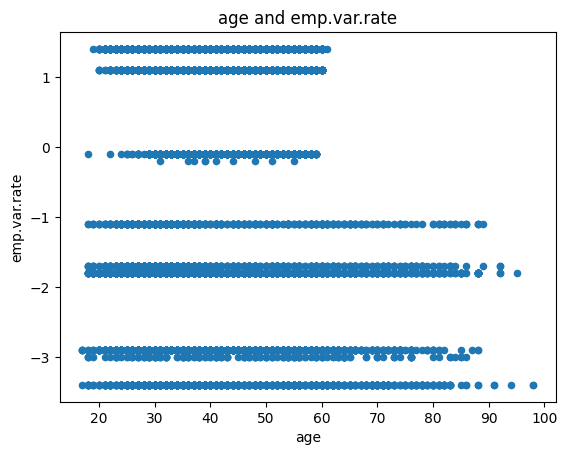

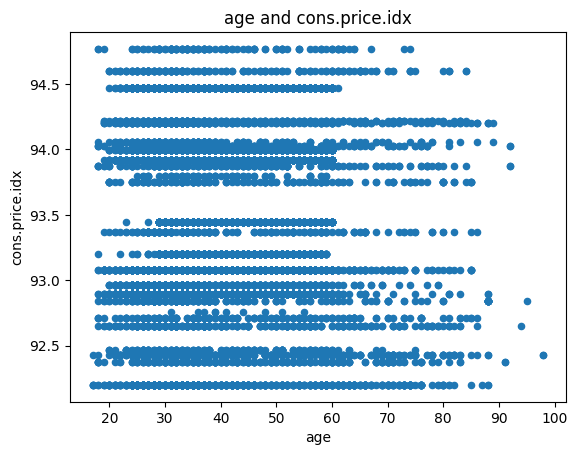

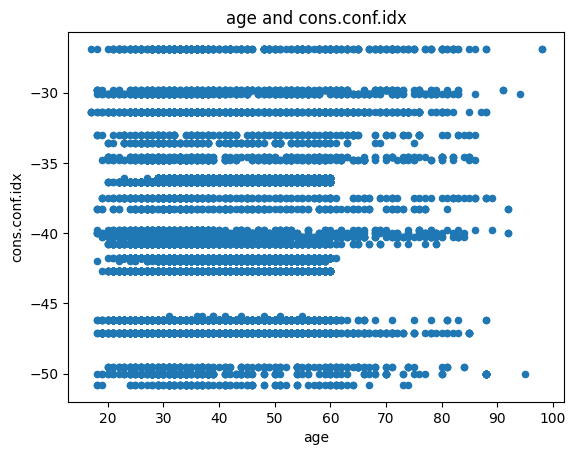

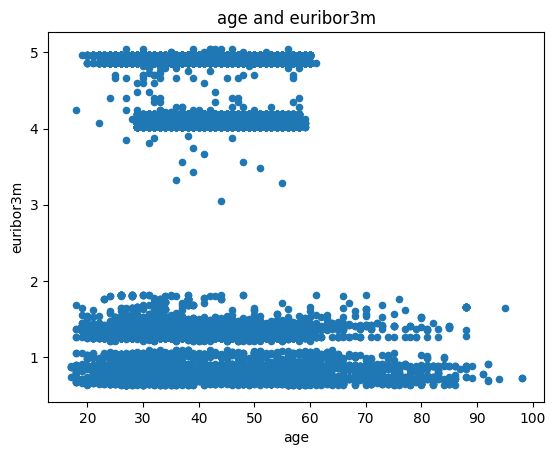

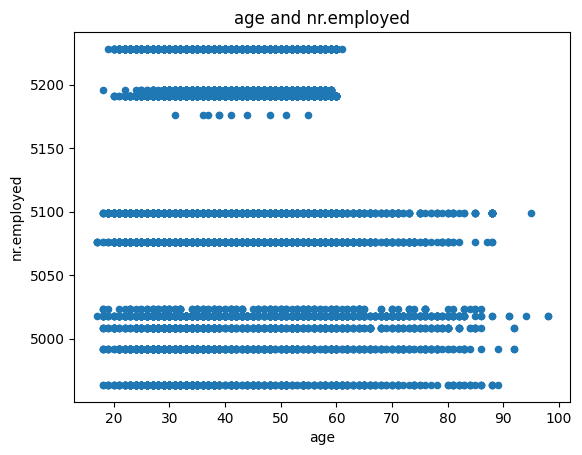

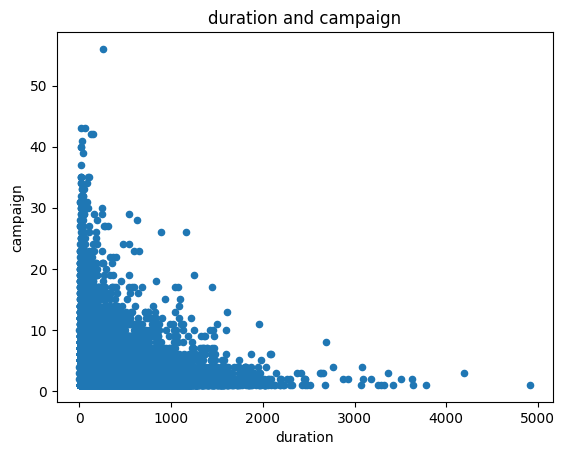

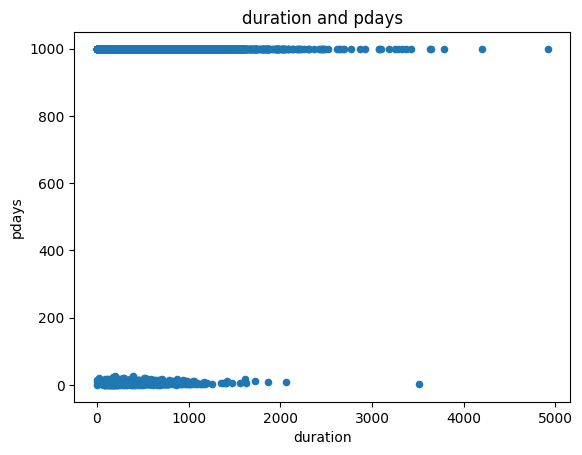

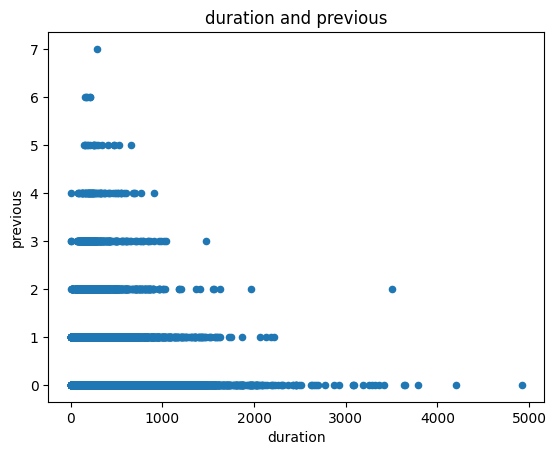

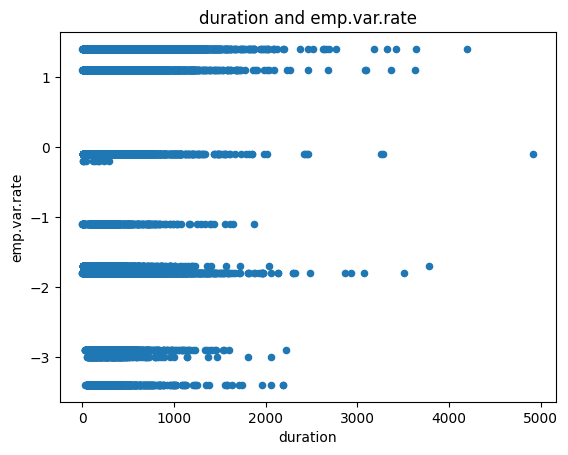

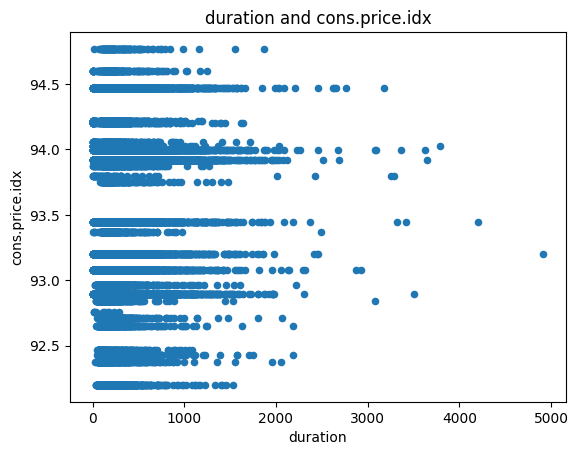

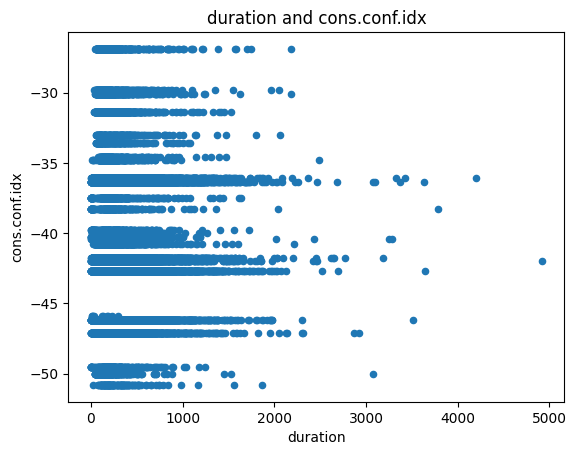

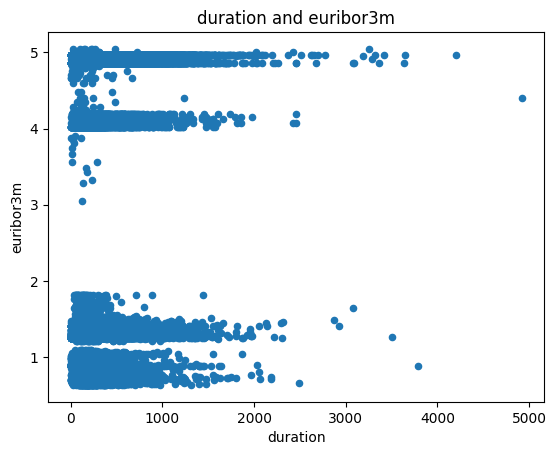

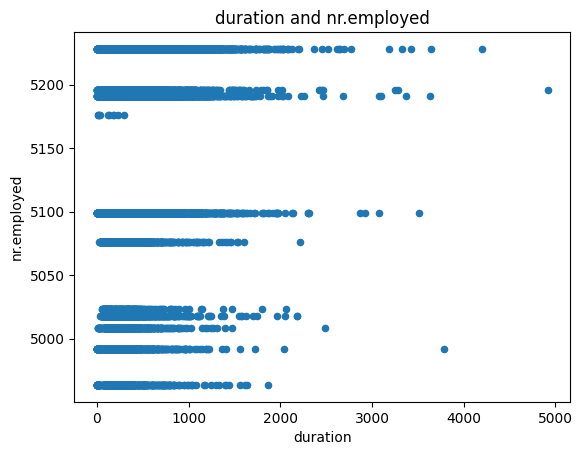

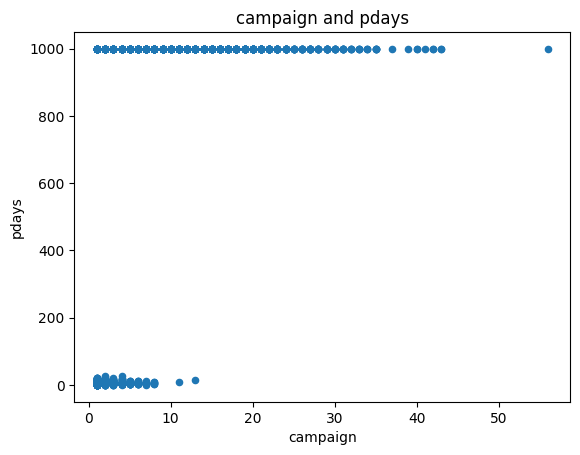

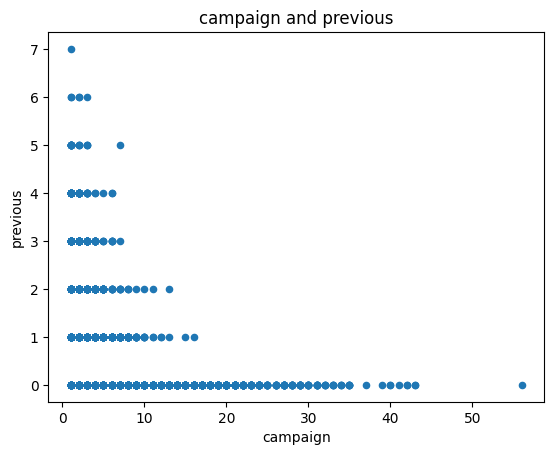

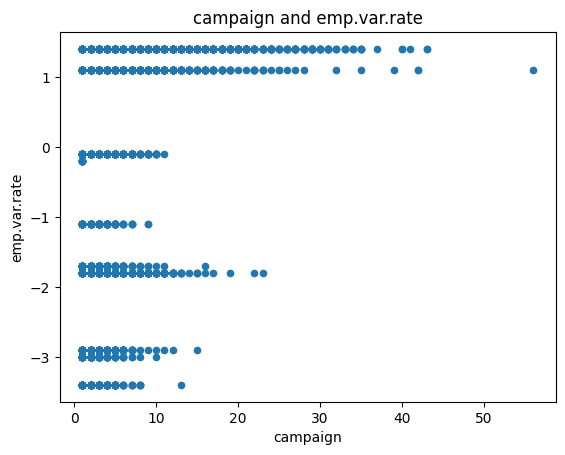

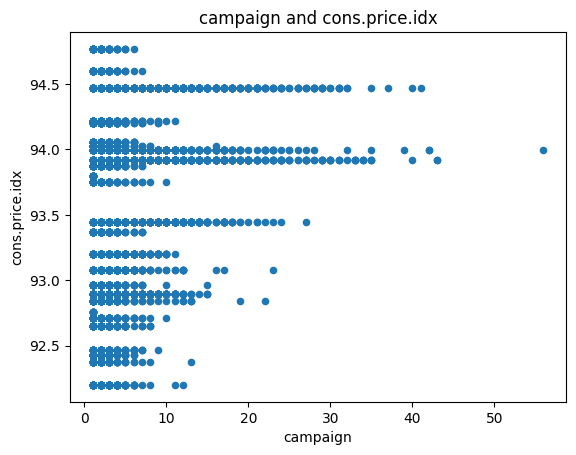

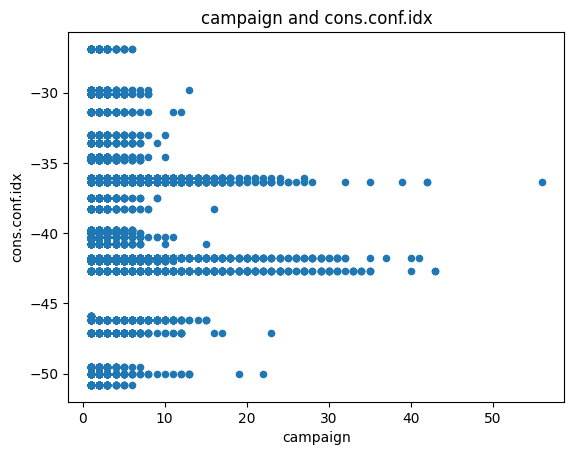

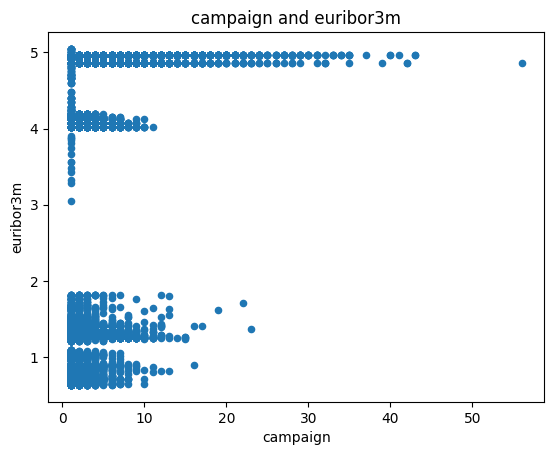

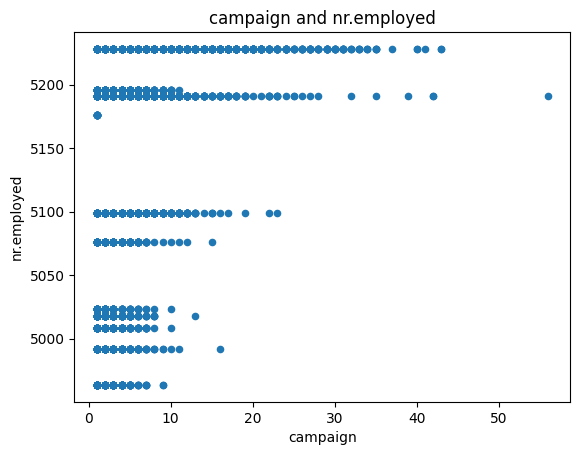

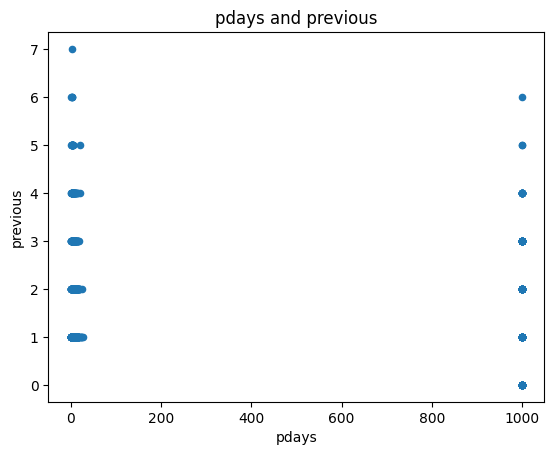

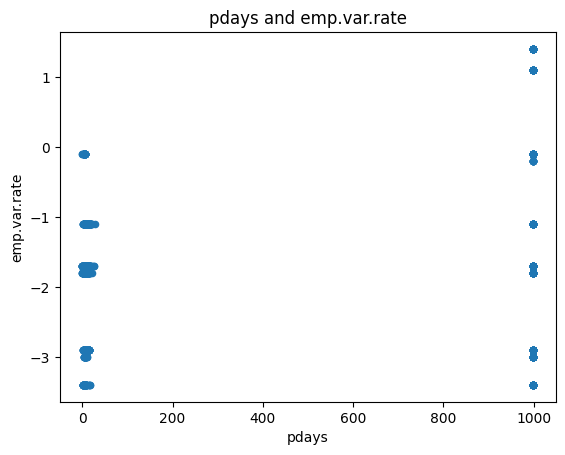

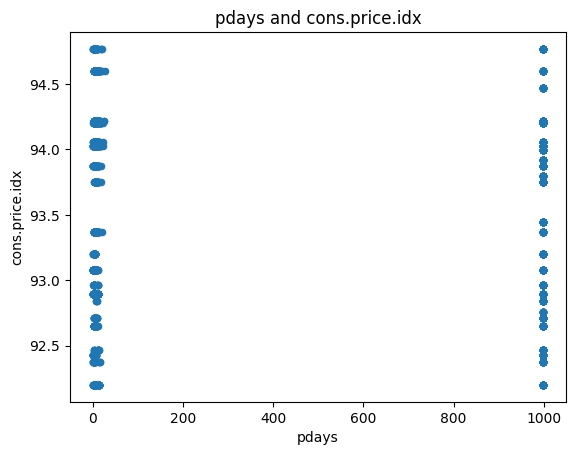

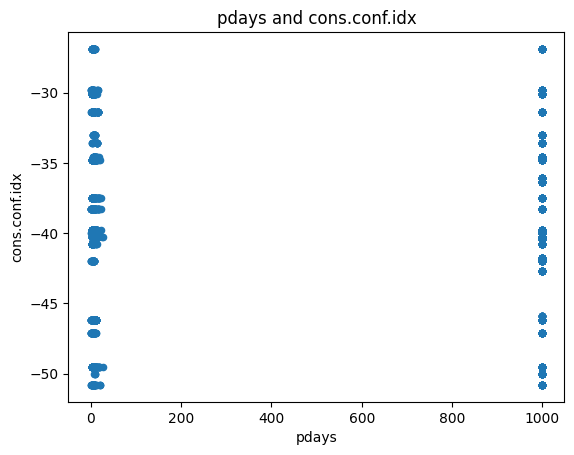

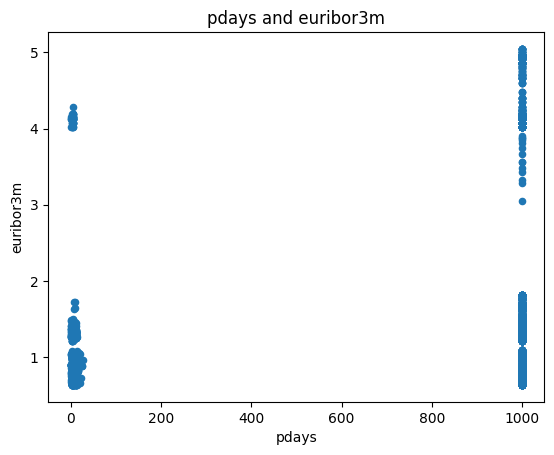

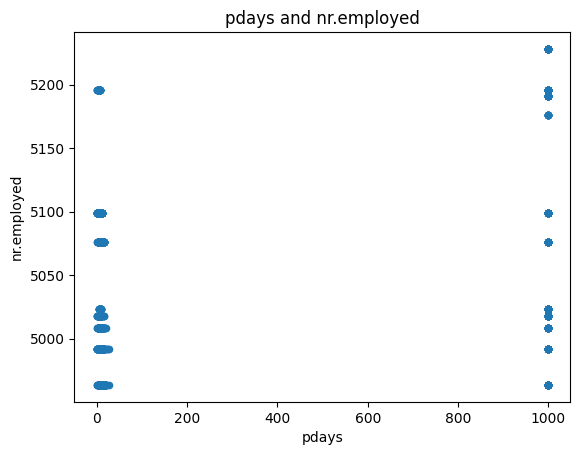

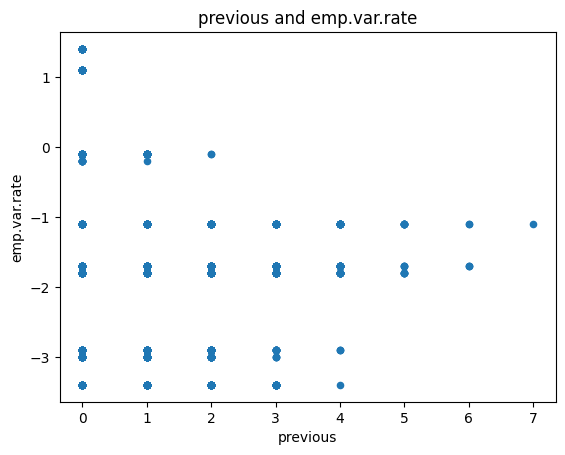

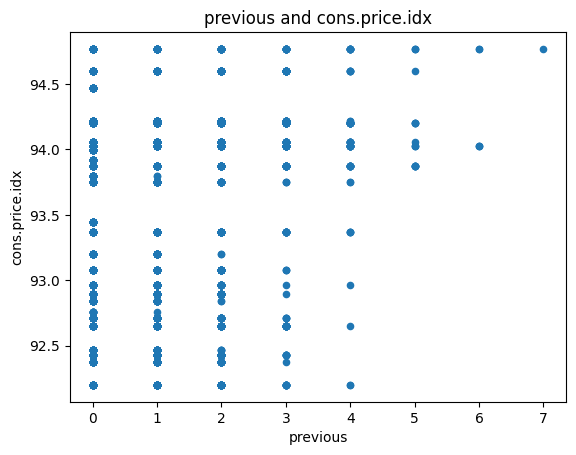

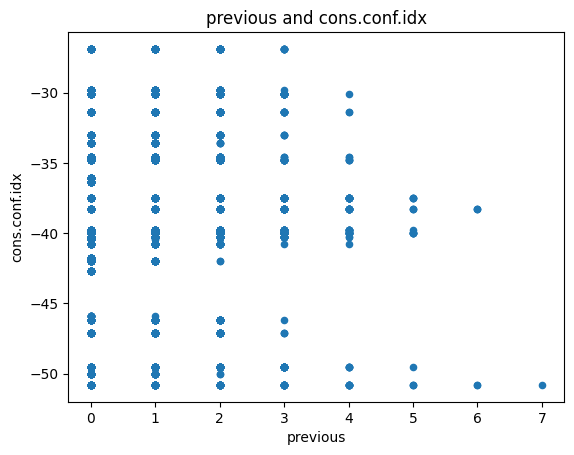

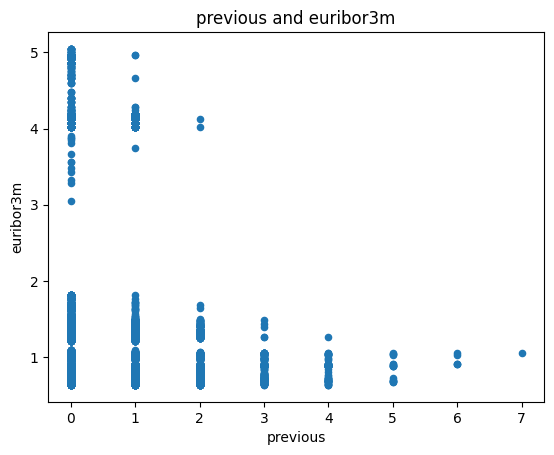

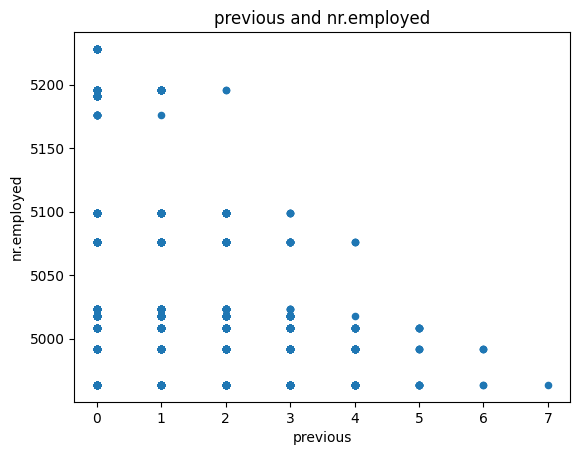

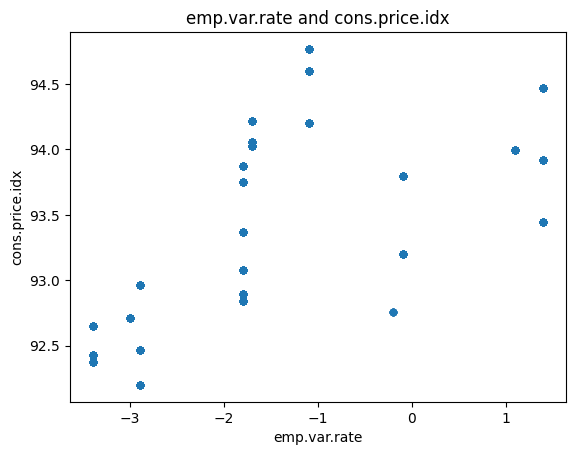

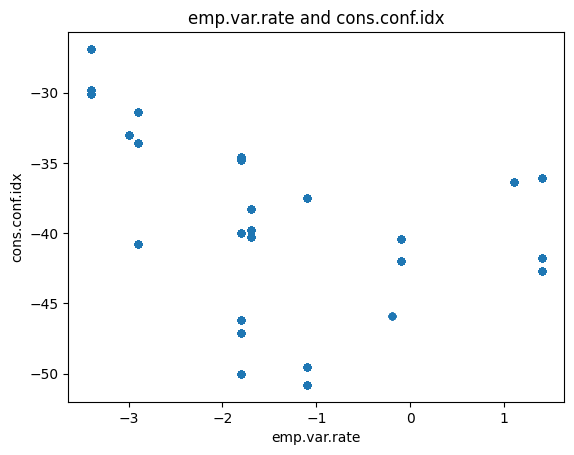

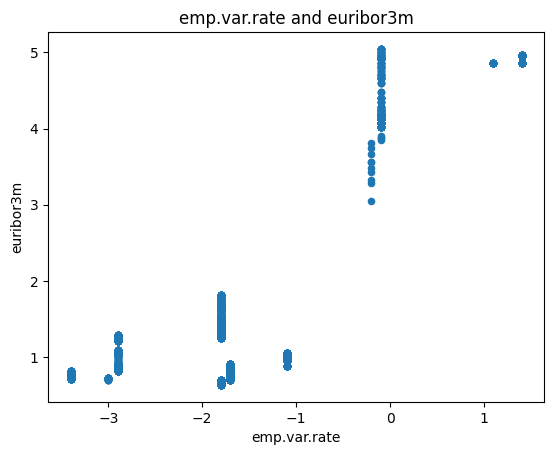

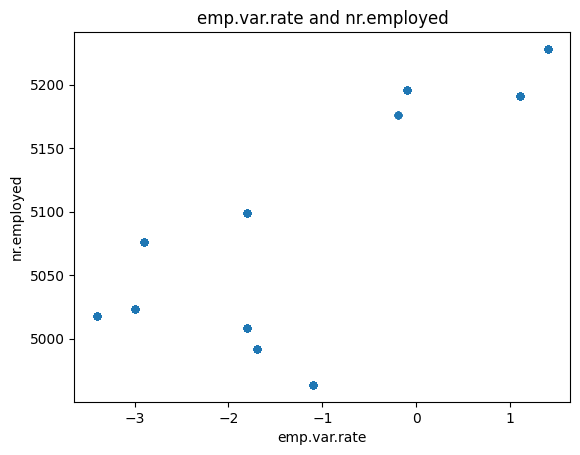

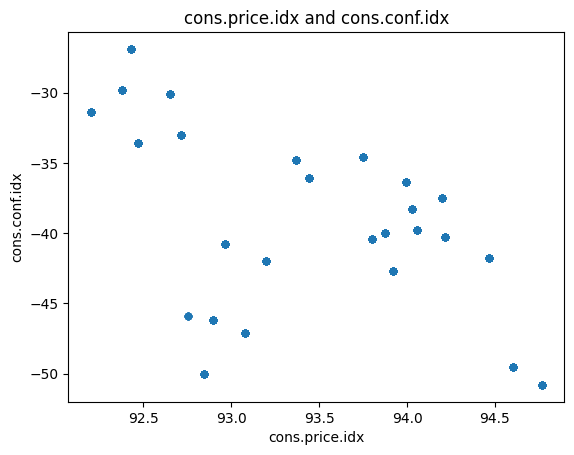

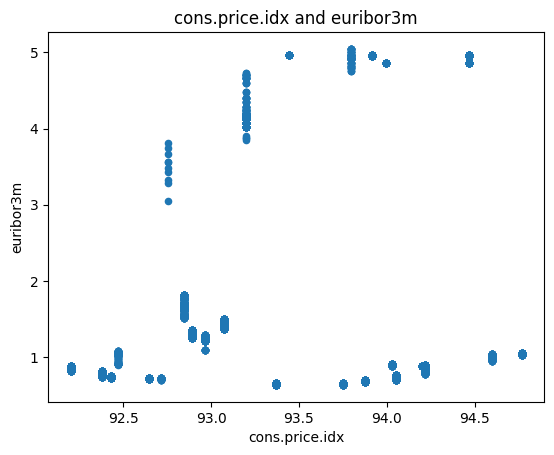

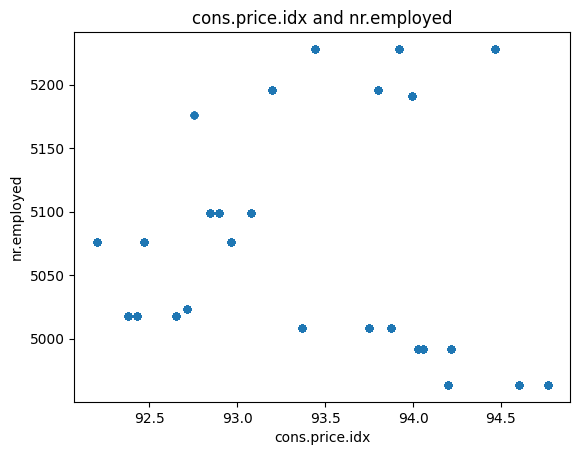

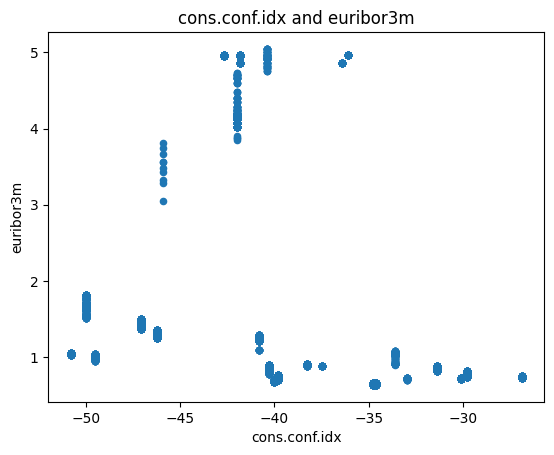

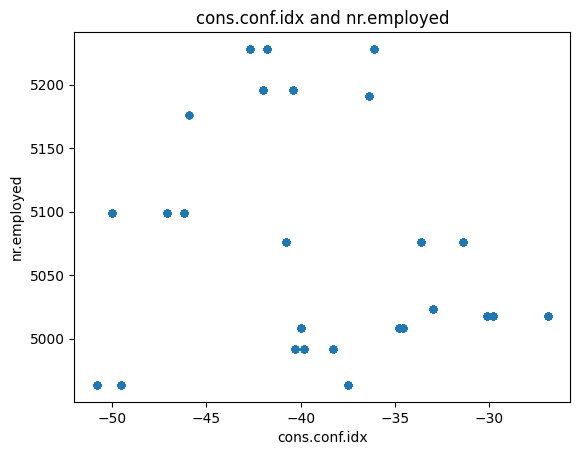

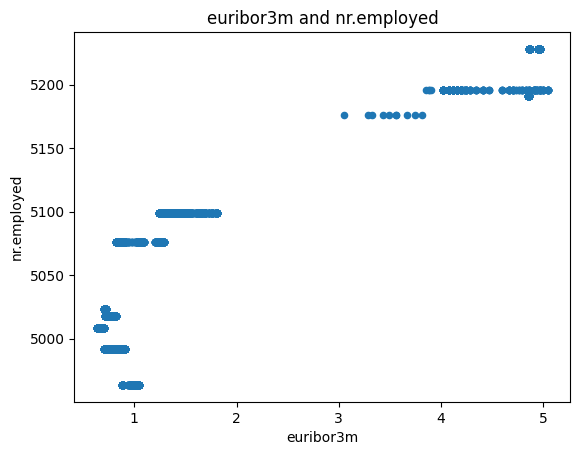

In [52]:
columns = df.select_dtypes(exclude="object").columns

columns = list(columns)
print(columns)

temp_columns = list(columns)
for column in columns:
  temp_columns.remove(column)
  for temp_column in temp_columns:
    df.plot.scatter(x=column, y=temp_column)
    plt.title(f"{column} and {temp_column}")
    plt.show()

#removing numeric outlairs with IQR

In [53]:
columns = df.select_dtypes(exclude="object").columns

for column in columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[ (df[column] >= lower_bound) & (df[column] <= upper_bound) ]

df.shape

(23098, 21)

#Bar plots for categorical data

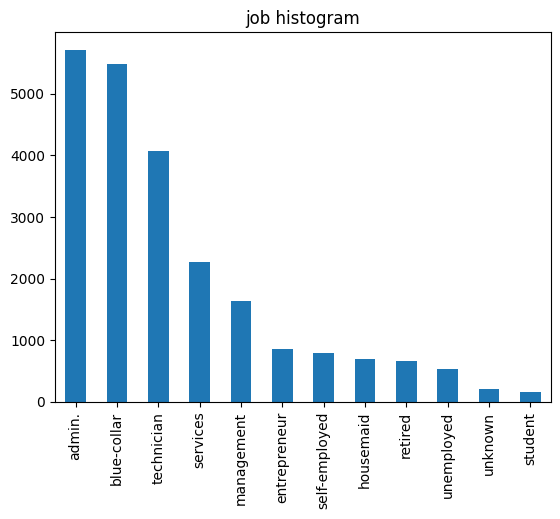

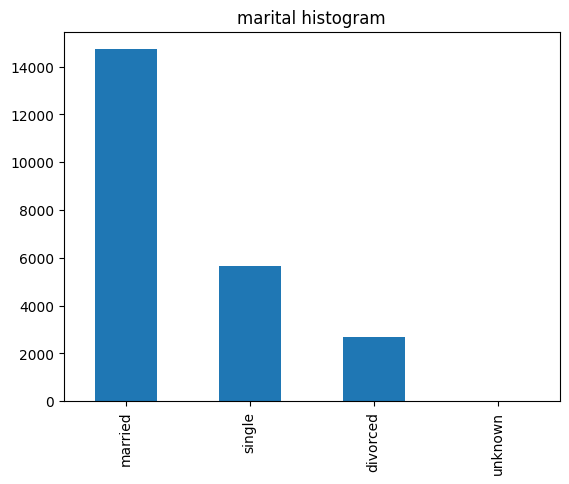

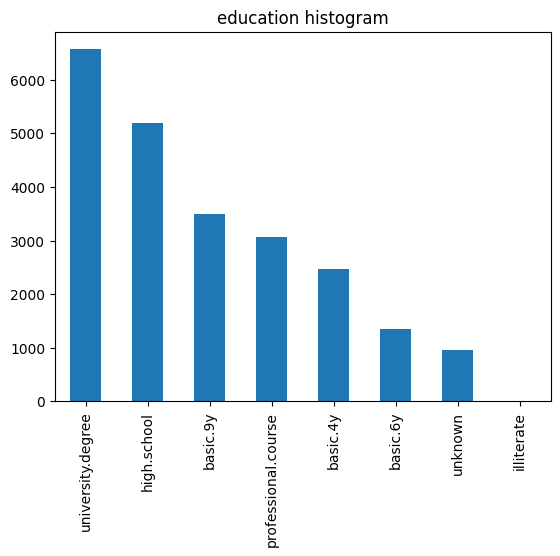

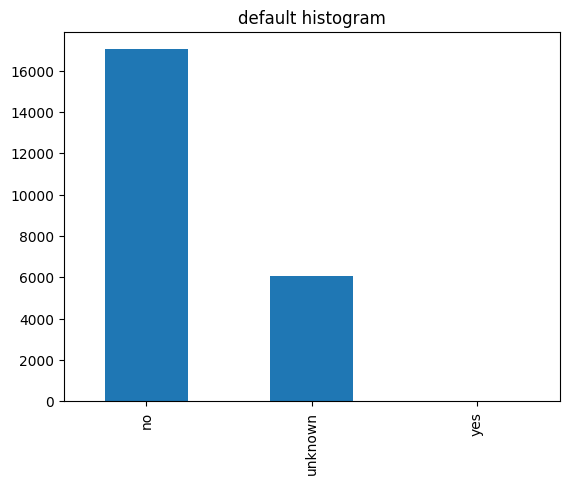

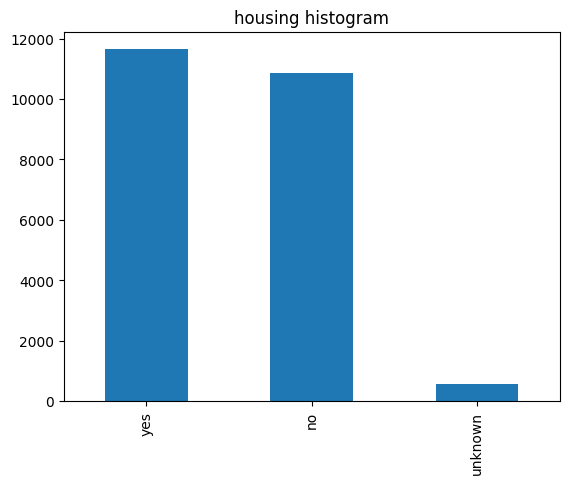

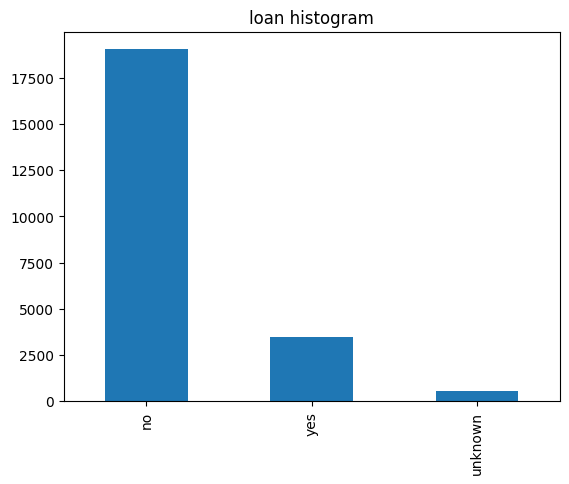

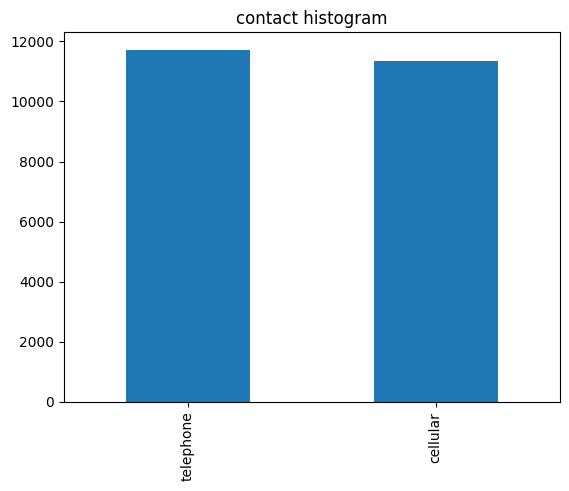

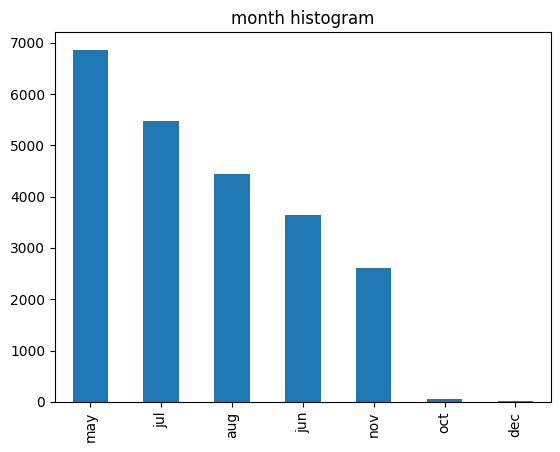

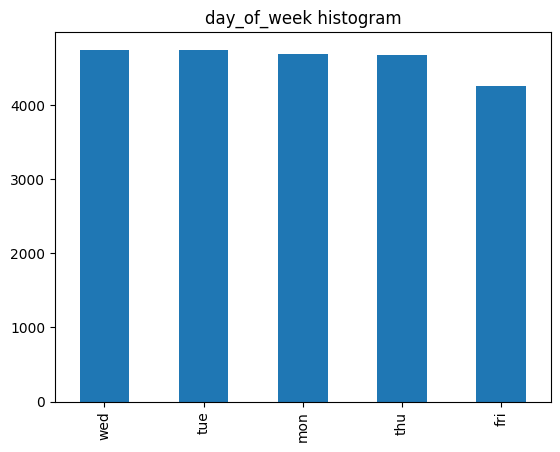

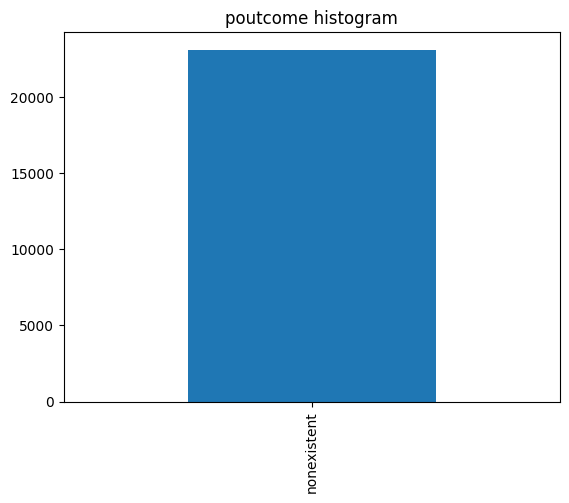

In [54]:
columns = df.select_dtypes(include="object").drop("y",axis=1).columns

for column in columns:
  df[column].value_counts().plot(kind="bar")
  plt.title(f"{column} histogram")
  plt.show()

#removing redundant numerical columns

In [33]:
df.pdays.unique(),df.previous.unique()

(array([999]), array([0]))

In [55]:
df = df.drop(["pdays","previous","poutcome"],axis=1)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

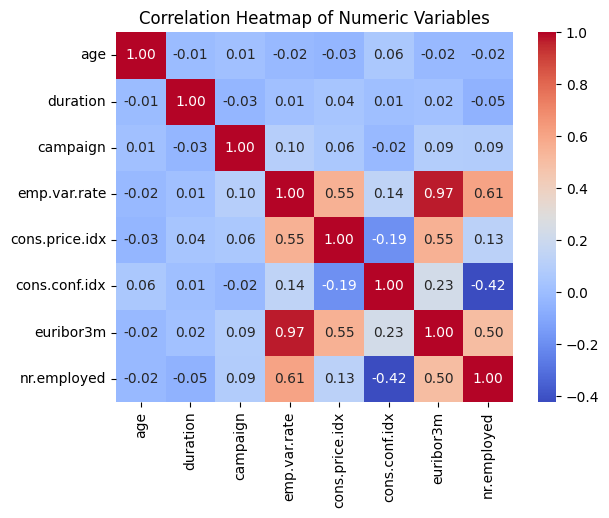

In [56]:
# Calculate correlation matrix
correlation_matrix = df.select_dtypes(exclude="object").corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()